# Food Desert Investigation

## Exploratory Data Analysis

### Initial Imports

#### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Data

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.head()

,FIPS,State,County,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,...,PCT_NHNA10,PCT_NHPI10,PCT_NHWHITE10,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015
0,1001,AL,autauga,18.8,0,0.0,4216.473194,4822.500269,4616.971480,-4.261872,...,0.397647,0.040314,77.246156,6.886107,5.492806,0.0,0.0,0.0,12.7,54838
1,1003,AL,baldwin,19.6,1,0.0,3540.965826,7916.131932,7007.972675,-11.472260,...,0.628755,0.043343,83.504787,5.542340,6.346384,0.0,0.0,0.0,12.9,202995
2,1005,AL,barbour,45.2,0,0.0,2713.124930,940.419327,1031.927776,9.730601,...,0.218524,0.087409,46.753105,4.582140,2.317528,1.0,1.0,0.0,32.0,26294
3,1007,AL,bibb,29.3,0,0.0,419.099942,249.204753,232.642670,-6.645974,...,0.279293,0.030548,75.020729,9.253986,9.060807,1.0,0.0,0.0,22.2,22562
4,1009,AL,blount,22.2,0,0.0,95.842687,384.911607,910.686113,136.596168,...,0.497191,0.031402,88.887338,8.097947,7.895581,0.0,0.0,0.0,14.7,57522


In [4]:
df.describe()

,FIPS,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,LACCESS_HHNV10,LACCESS_HHNV15,...,PCT_NHNA10,PCT_NHPI10,PCT_NHWHITE10,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03
mean,30387.632484,23.236306,0.573567,0.157006,2259.975196,4962.448457,4721.790551,275.148527,660.900434,673.485260,...,1.812958,0.080520,78.343850,8.501296,7.011192,0.224841,0.111783,0.168471,16.259283,1.021402e+05
std,15156.372045,9.363672,0.494637,0.970675,8772.373013,13175.136944,12188.860573,11016.241702,1121.570831,1100.582981,...,7.241848,0.946025,19.805889,3.277897,3.800416,0.417544,0.315150,0.374344,6.441990,3.282909e+05
min,1001.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,...,0.000000,0.000000,2.860408,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000,8.800000e+01
25%,18178.500000,16.200000,0.000000,0.000000,7.000000,365.182063,357.517444,-10.797016,118.110707,126.004765,...,0.194960,0.010005,66.994751,6.573317,4.912017,0.000000,0.000000,0.000000,11.500000,1.095400e+04
50%,29176.000000,22.300000,1.000000,0.000000,88.031385,937.561324,951.889339,-0.038024,320.013520,340.348323,...,0.304993,0.022943,85.772028,8.119723,7.075466,0.000000,0.000000,0.000000,15.200000,2.564850e+04
75%,45079.500000,29.100000,1.000000,0.000000,1003.774030,3009.332967,2982.926315,7.006581,706.477808,754.501764,...,0.625350,0.046501,94.175301,10.033524,9.187047,0.000000,0.000000,0.000000,19.700000,6.749650e+04
max,56045.000000,61.600000,1.000000,20.000000,167913.190400,260308.794100,219002.492900,592130.563800,16334.423180,13845.220200,...,86.319184,48.888889,99.163180,57.417468,35.714286,1.000000,1.000000,1.000000,47.400000,1.009704e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS                       3140 non-null   int64  
 1   State                      3140 non-null   object 
 2   County                     3140 non-null   object 
 3   CHILDPOVRATE15             3140 non-null   float64
 4   FARM_TO_SCHOOL15           3140 non-null   int64  
 5   FDPIR15                    3140 non-null   float64
 6   LACCESS_BLACK15            3140 non-null   float64
 7   LACCESS_CHILD10            3140 non-null   float64
 8   LACCESS_CHILD15            3140 non-null   float64
 9   LACCESS_CHILD_10_15        3140 non-null   float64
 10  LACCESS_HHNV10             3140 non-null   float64
 11  LACCESS_HHNV15             3140 non-null   float64
 12  LACCESS_HISP15             3140 non-null   float64
 13  LACCESS_LOWI10             3140 non-null   float

### Dependent Variable

#### Initial Exploration

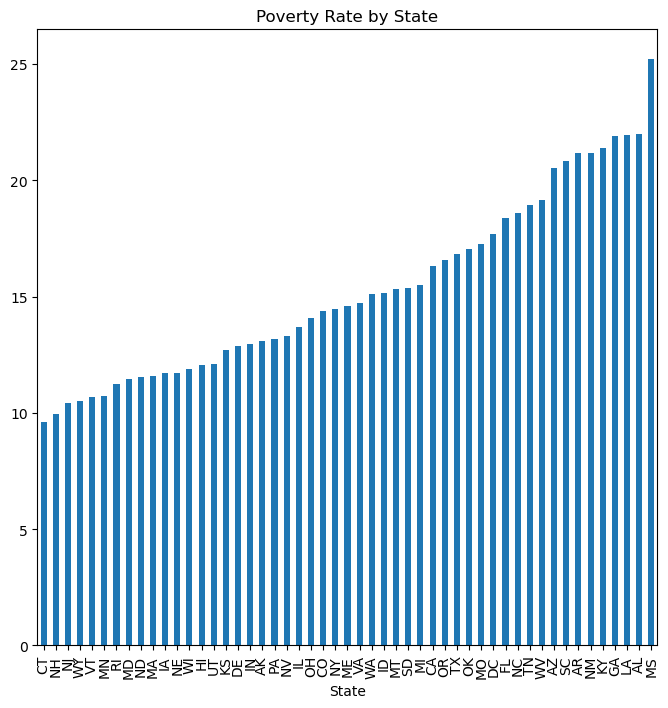

In [36]:
plt.figure(figsize=(8,8))
pov_by_state = df.groupby("State")["POVRATE15"].mean().sort_values(ascending=True)
pov_by_state.plot(kind="bar", title="Poverty Rate by State")
plt.show()

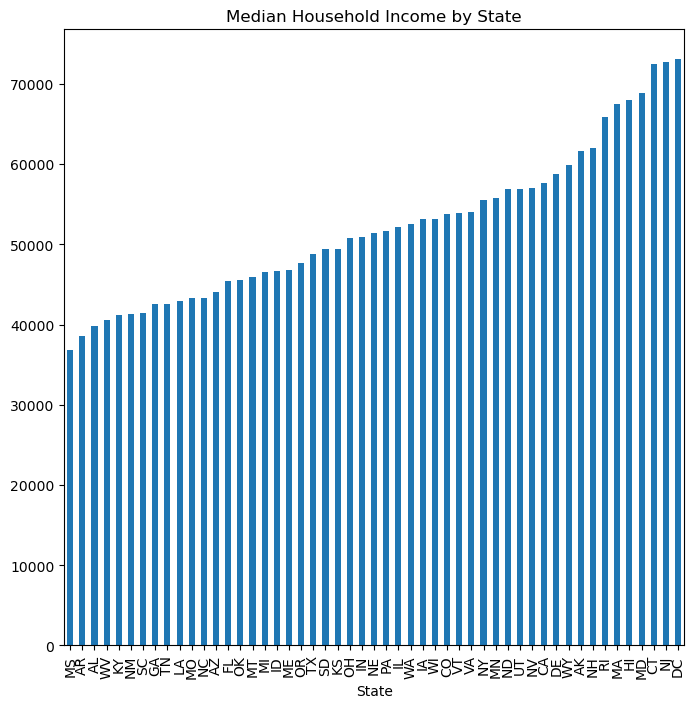

In [37]:
plt.figure(figsize=(8,8))
median_income = df.groupby("State")["MEDHHINC15"].mean().sort_values(ascending=True)
median_income.plot(kind="bar", title="Median Household Income by State")
plt.show()

#### Correlation

In [52]:
#df.iloc[:,3:64].corr()

In [53]:
df.corr(numeric_only=True)

,FIPS,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,LACCESS_HHNV10,LACCESS_HHNV15,...,PCT_NHNA10,PCT_NHPI10,PCT_NHWHITE10,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015
FIPS,1.000000,-0.124826,0.000944,-0.041413,-0.043990,-0.033222,-0.036290,-0.003372,-0.024084,-0.031147,...,-0.003939,-0.038833,0.050573,-0.040672,-0.026956,-0.072625,-0.076118,-0.015343,-0.119274,-0.055913
CHILDPOVRATE15,-0.124826,1.000000,-0.174568,0.065719,0.023127,-0.134722,-0.135858,0.022856,-0.016952,-0.017379,...,0.157449,-0.034116,-0.449157,-0.053772,-0.298191,0.678455,0.604093,0.015514,0.938107,-0.086304
FARM_TO_SCHOOL15,0.000944,-0.174568,1.000000,0.053235,0.139708,0.234020,0.236472,-0.015396,0.271213,0.280811,...,-0.002082,-0.003512,0.053791,-0.095174,-0.093265,-0.171120,-0.121233,-0.152120,-0.155632,0.184498
FDPIR15,-0.041413,0.065719,0.053235,1.000000,-0.002980,0.114311,0.123399,-0.003755,0.105834,0.114026,...,0.375545,0.006543,-0.150919,0.018573,0.032523,0.049640,0.061329,-0.045639,0.091937,0.112026
LACCESS_BLACK15,-0.043990,0.023127,0.139708,-0.002980,1.000000,0.705404,0.706536,-0.006410,0.691389,0.702812,...,-0.048373,0.001050,-0.290494,-0.160054,-0.157371,0.013493,-0.027885,-0.055499,0.018217,0.545301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PERCHLDPOV10,-0.072625,0.678455,-0.171120,0.049640,0.013493,-0.093807,-0.095147,0.000191,-0.027633,-0.034492,...,0.167690,-0.027945,-0.454300,-0.090606,-0.275447,1.000000,0.641753,0.022540,0.674799,-0.066378
PERPOV10,-0.076118,0.604093,-0.121233,0.061329,-0.027885,-0.080707,-0.083638,-0.007094,-0.042357,-0.049644,...,0.163787,-0.021973,-0.414185,-0.157843,-0.283997,0.641753,1.000000,0.042845,0.646656,-0.056734
POPLOSS10,-0.015343,0.015514,-0.152120,-0.045639,-0.055499,-0.109895,-0.111915,-0.009833,-0.109583,-0.114348,...,-0.009785,-0.026503,0.115368,0.165676,0.179945,0.022540,0.042845,1.000000,0.006452,-0.092032
POVRATE15,-0.119274,0.938107,-0.155632,0.091937,0.018217,-0.118369,-0.119156,0.015864,-0.008528,-0.010448,...,0.201751,-0.031209,-0.483423,-0.093031,-0.320905,0.674799,0.646656,0.006452,1.000000,-0.072828


Visualizing the correlation of numerical columns

In [47]:
#_ = sns.pairplot(df.iloc[:,3:64])
#plt.show()

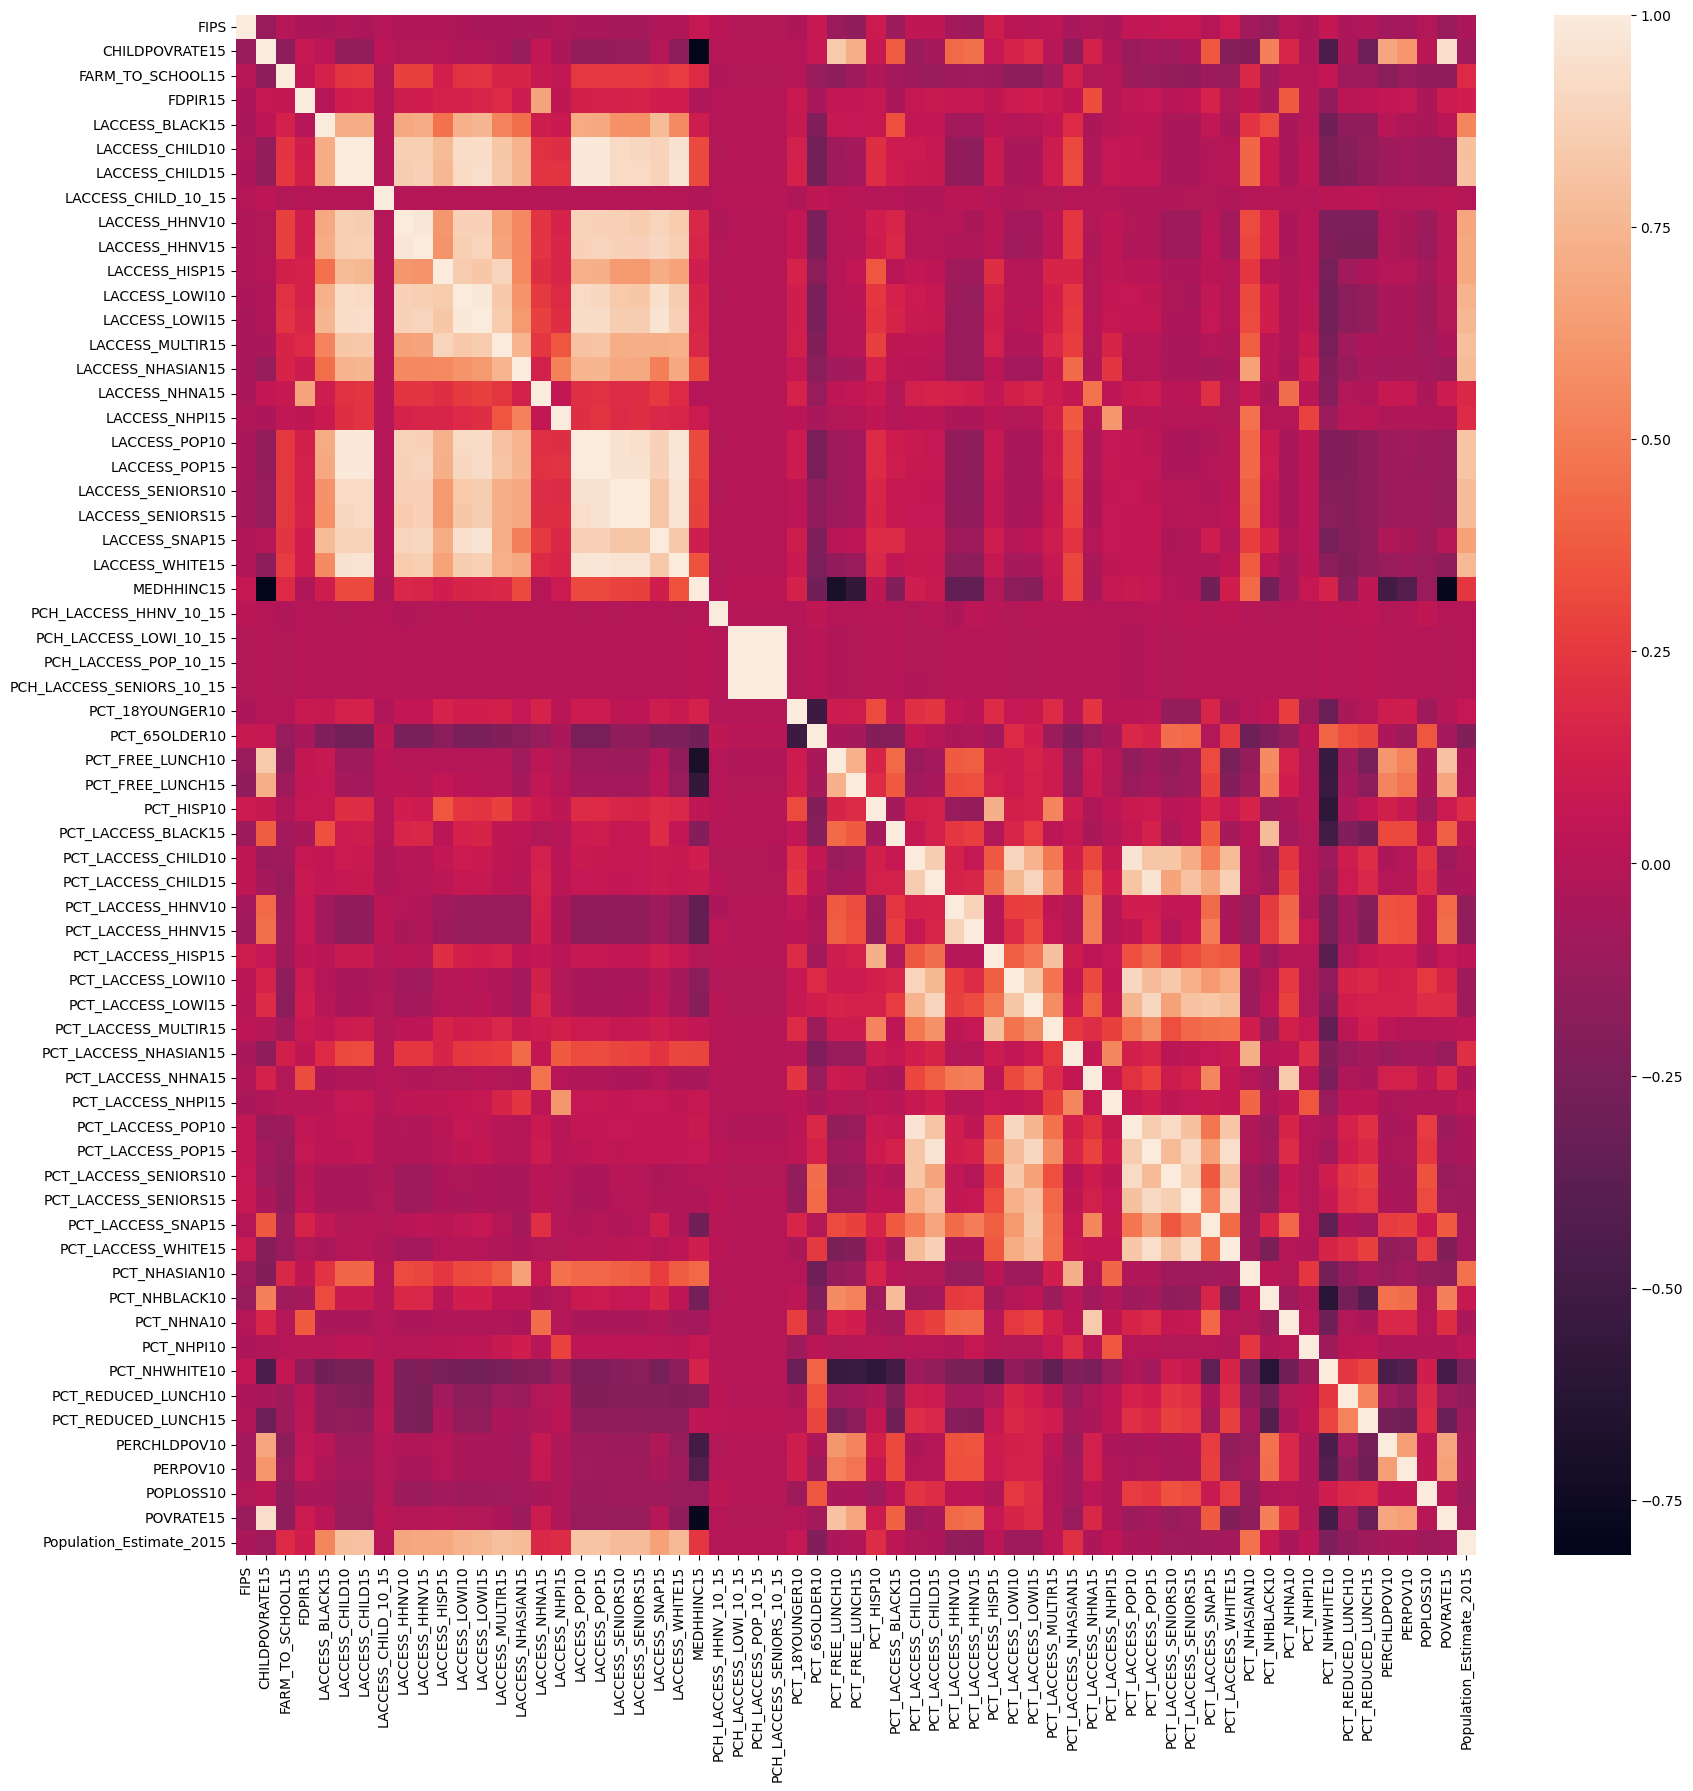

In [54]:
plt.figure(figsize=(20,20))
_ = sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.show()

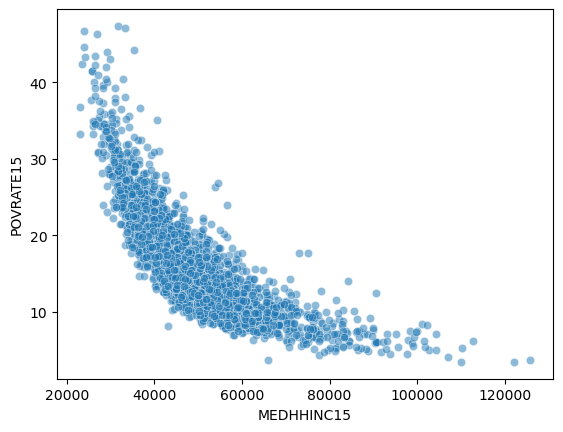

In [55]:
# Plot POVRATE15 against Median Household Income 2015
_ = sns.scatterplot(data=df, x='MEDHHINC15', y='POVRATE15', alpha=0.5)
plt.show()

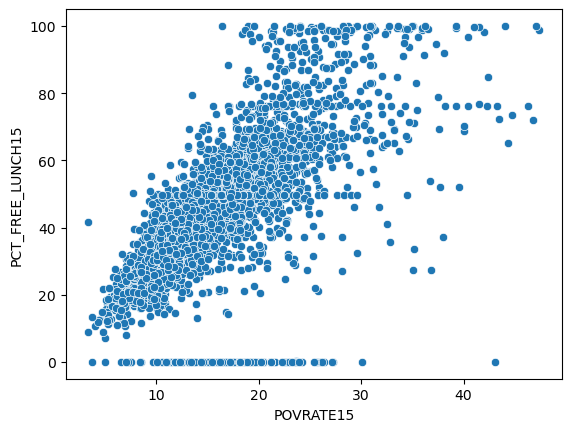

In [24]:
# Plot POVRATE15 against Percent Free Lunch 2015
_ = sns.scatterplot(data=df, x='POVRATE15', y='PCT_FREE_LUNCH15')
plt.show()

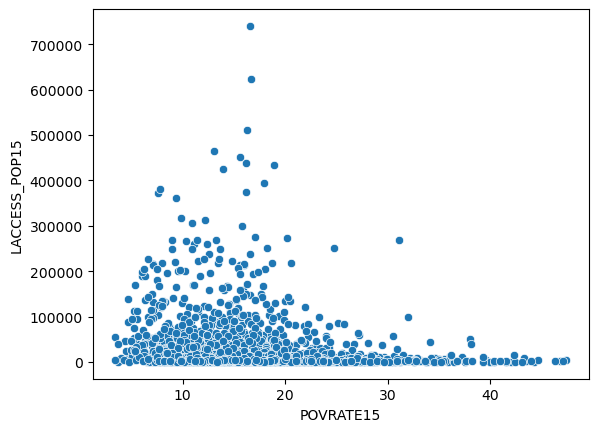

In [27]:
# Plot POVRATE15 against Number of People with Low Access 2015
_ = sns.scatterplot(data=df, x='POVRATE15', y='LACCESS_POP15')
plt.show()

In [28]:
df['LACCESS_POP15'].corr()

TypeError: Series.corr() missing 1 required positional argument: 'other'

#### Poverty Rate

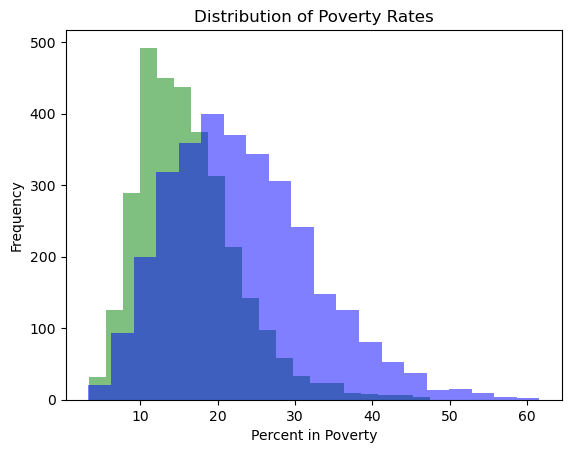

In [9]:
_ = plt.hist(df['POVRATE15'], bins=20, color='g', alpha=0.5)
_ = plt.hist(df['CHILDPOVRATE15'], bins=20, color='b', alpha=0.5)
plt.xlabel('Percent in Poverty')
plt.ylabel('Frequency')
plt.title('Distribution of Poverty Rates')
plt.show()

In [10]:
df['POVRATE15'].describe()

count    3140.000000
mean       16.259283
std         6.441990
min         3.400000
25%        11.500000
50%        15.200000
75%        19.700000
max        47.400000
Name: POVRATE15, dtype: float64